# 数据预处理

In [22]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [23]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [24]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [25]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [26]:
y_Train_One_Hot = np_utils.to_categorical(y_train_label)
y_Test_One_Hot = np_utils.to_categorical(y_test_label)

# 建立模型

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [28]:
model = Sequential()

In [29]:
#将“输入层”与“隐藏层”加入模型

In [30]:
model.add(Dense(units=1000, 
                input_dim=784, 
                activation='relu'))
model.add(Dropout(0.25))

In [31]:
#将“输出层”加入模型

In [32]:
model.add(Dense(units=10, 
                activation='softmax'))

In [33]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


# 训练模型

In [34]:
model.compile(loss='categorical_crossentropy', 
              optimizer='Adagrad', metrics=['accuracy'])

In [35]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_One_Hot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.3102 - acc: 0.9128 - val_loss: 0.1510 - val_acc: 0.9584
Epoch 2/10
 - 7s - loss: 0.1393 - acc: 0.9601 - val_loss: 0.1218 - val_acc: 0.9653
Epoch 3/10
 - 7s - loss: 0.1080 - acc: 0.9702 - val_loss: 0.1077 - val_acc: 0.9685
Epoch 4/10
 - 7s - loss: 0.0896 - acc: 0.9743 - val_loss: 0.0980 - val_acc: 0.9707
Epoch 5/10
 - 7s - loss: 0.0769 - acc: 0.9785 - val_loss: 0.0920 - val_acc: 0.9728
Epoch 6/10
 - 7s - loss: 0.0664 - acc: 0.9820 - val_loss: 0.0862 - val_acc: 0.9744
Epoch 7/10
 - 7s - loss: 0.0600 - acc: 0.9842 - val_loss: 0.0834 - val_acc: 0.9763
Epoch 8/10
 - 7s - loss: 0.0535 - acc: 0.9859 - val_loss: 0.0796 - val_acc: 0.9762
Epoch 9/10
 - 7s - loss: 0.0486 - acc: 0.9871 - val_loss: 0.0782 - val_acc: 0.9771
Epoch 10/10
 - 7s - loss: 0.0455 - acc: 0.9879 - val_loss: 0.0756 - val_acc: 0.9769


# 以图形显示训练过程

In [36]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

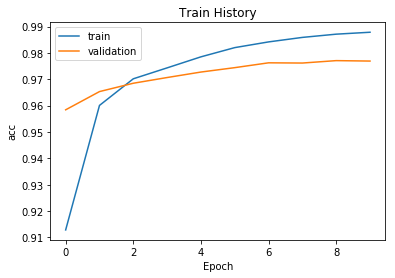

In [37]:
show_train_history(train_history,'acc','val_acc')

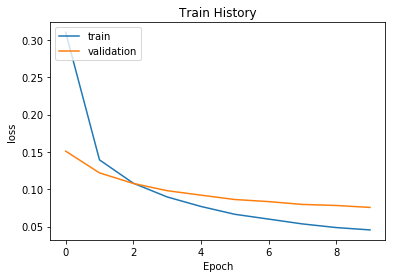

In [38]:
show_train_history(train_history,'loss','val_loss')

# 评估模型的准确率

In [21]:
scores = model.evaluate(x_Test_normalize, y_Test_One_Hot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 65us/step

accuracy= 0.9778


# 进行预测

In [19]:
prediction=model.predict_classes(x_Test)

 9504/10000 [===========================>..] - ETA: 0s

In [20]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

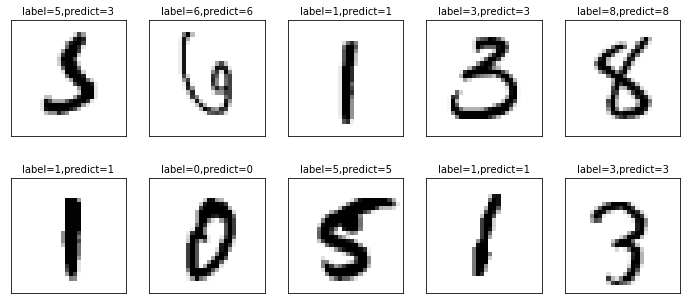

In [22]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [23]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,2,1,1,0,1,1,2,0
1,0,1127,3,1,0,1,1,1,1,0
2,3,1,1008,5,2,0,3,7,3,0
3,2,0,2,997,0,2,0,3,3,1
4,1,1,5,1,966,0,2,1,1,4
5,3,0,0,22,1,852,5,2,3,4
6,5,3,1,1,4,3,940,0,1,0
7,1,4,8,3,1,0,0,1007,2,2
8,3,0,4,12,3,0,1,3,945,3


In [24]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [25]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1082,5,3
1393,5,3
1670,5,3
2035,5,3
2162,5,3
2526,5,3
2597,5,3
2810,5,3


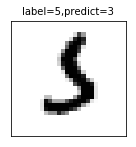

In [26]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

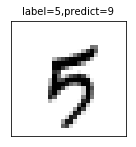

In [27]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)